# Lab 1 - Random data visualisation and sampling
#### Dominik Czyżyk
gr. 3 - Thursday 9:30

In [6]:
# 1, 2
import numpy as np

uniform = np.random.uniform(0,1,1000)
normal_0_1 = np.random.normal(0,1,1000)
normal_0_10 = np.random.normal(0,10,1000)
beta_1_1 = np.random.beta(1,1,1000)
beta_2_2 = np.random.beta(2,2,1000)
beta_3_9 = np.random.beta(3,9,1000)
two_dimensional_normal_diagonal_cov = np.random.multivariate_normal([0,0], [[1, 0], [0, 1]], 10000)
two_dimensional_normal_other_cov = np.random.multivariate_normal([0,0], [[2, 1], [1, 2]], 10000)

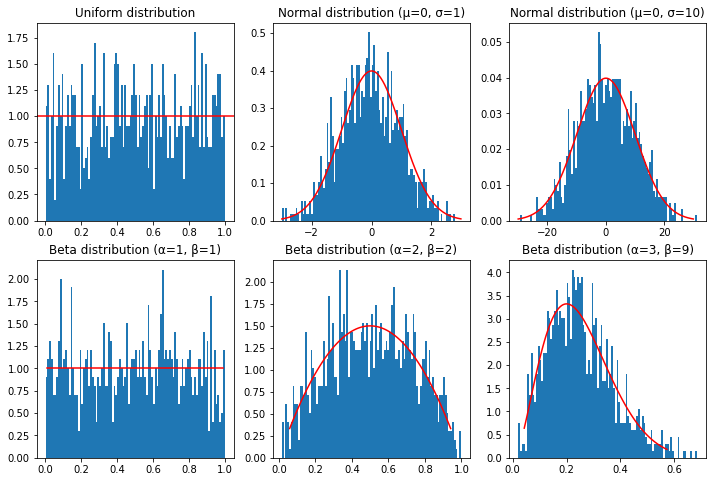

In [12]:
# 3
import matplotlib.pyplot as plt
from scipy.stats import uniform as uniform_dist
from scipy.stats import norm, beta

uniform_x = uniform_dist.rvs(0.01,0.99,size=1000)
normal_0_1_x = np.arange(-3, 3, 0.01)
normal_0_10_x = np.arange(-30, 30, 0.1)
beta_1_1_x = np.linspace(beta.ppf(0.01, 1, 1),beta.ppf(0.99, 1, 1), 100)
beta_2_2_x = np.linspace(beta.ppf(0.01, 2, 2),beta.ppf(0.99, 2, 2), 100)
beta_3_9_x = np.linspace(beta.ppf(0.01, 3, 9),beta.ppf(0.99, 3, 9), 100)

fig, axs = plt.subplots(2, 3, figsize=(12,8))
axs[0,0].hist(uniform, bins=100, density=True)
axs[0,0].axhline(y=uniform_dist.pdf(x[0]), color='r')
axs[0,0].set_title("Uniform distribution")
axs[0,1].hist(normal_0_1, bins=100, density=True)
axs[0,1].plot(normal_0_1_x, norm.pdf(normal_0_1_x, 0, 1), color='r')
axs[0,1].set_title("Normal distribution (\u03BC=0, \u03C3=1)")
axs[0,2].hist(normal_0_10, bins=100, density=True)
axs[0,2].plot(normal_0_10_x, norm.pdf(normal_0_10_x, 0, 10), color='r')
axs[0,2].set_title("Normal distribution (\u03BC=0, \u03C3=10)")
axs[1,0].hist(beta_1_1, bins=100, density=True)
axs[1,0].plot(beta_1_1_x, beta.pdf(beta_1_1_x, 1, 1), 'r-')
axs[1,0].set_title("Beta distribution (\u03B1=1, \u03B2=1)")
axs[1,1].hist(beta_2_2, bins=100, density=True)
axs[1,1].plot(beta_2_2_x, beta.pdf(beta_2_2_x, 2, 2), 'r-')
axs[1,1].set_title("Beta distribution (\u03B1=2, \u03B2=2)")
axs[1,2].hist(beta_3_9, bins=100, density=True)
axs[1,2].plot(beta_3_9_x, beta.pdf(beta_3_9_x, 3, 9), 'r-')
axs[1,2].set_title("Beta distribution (\u03B1=3, \u03B2=9)")
plt.show()

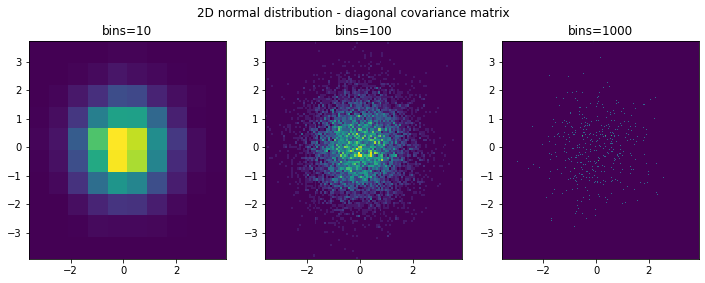

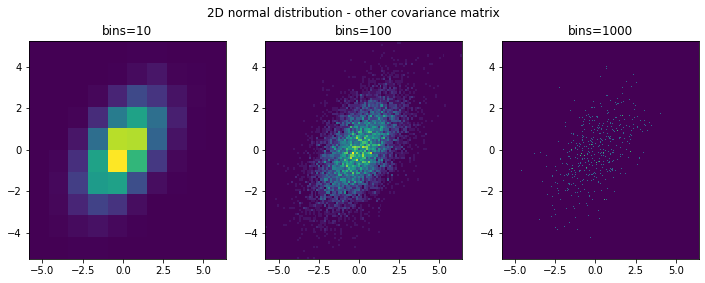

In [13]:
# 4
fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].hist2d(two_dimensional_normal_diagonal_cov[:,0], two_dimensional_normal_diagonal_cov[:,1], bins=10)
axs[0].set_title("bins=10")
axs[1].hist2d(two_dimensional_normal_diagonal_cov[:,0], two_dimensional_normal_diagonal_cov[:,1], bins=100)
axs[1].set_title("bins=100")
axs[2].hist2d(two_dimensional_normal_diagonal_cov[:,0], two_dimensional_normal_diagonal_cov[:,1], bins=1000)
axs[2].set_title("bins=1000")
plt.suptitle("2D normal distribution - diagonal covariance matrix", y=0.999)
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].hist2d(two_dimensional_normal_other_cov[:,0], two_dimensional_normal_other_cov[:,1], bins=10)
axs[0].set_title("bins=10")
axs[1].hist2d(two_dimensional_normal_other_cov[:,0], two_dimensional_normal_other_cov[:,1], bins=100)
axs[1].set_title("bins=100")
axs[2].hist2d(two_dimensional_normal_other_cov[:,0], two_dimensional_normal_other_cov[:,1], bins=1000)
axs[2].set_title("bins=1000")
plt.suptitle("2D normal distribution - other covariance matrix", y=0.999)
plt.show()

The fewer numer of bins, the lower the resolution of image and the brighter clusters of points.

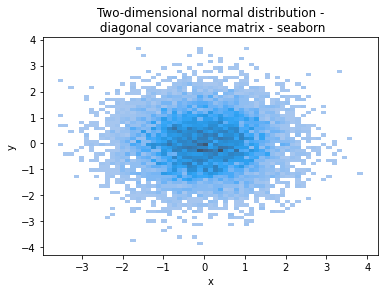

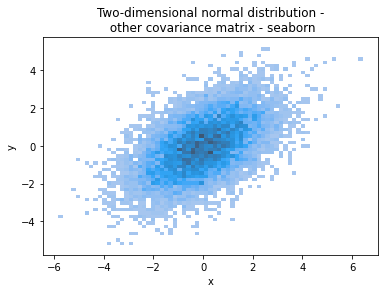

In [16]:
import seaborn as sns
import pandas as pd

titles = ['Two-dimensional normal distribution -\n diagonal covariance matrix - seaborn',
         'Two-dimensional normal distribution -\n other covariance matrix - seaborn']
arrays = [two_dimensional_normal_diagonal_cov, two_dimensional_normal_other_cov]

for i, arr in enumerate(arrays):
    arr_df = pd.DataFrame(arr, columns = ['x', 'y'])
    sns.histplot(arr_df, x='x', y='y')
    plt.title(titles[i])
    plt.show()

In [17]:
# 5
y_points = np.zeros(1000)
alphas = np.zeros(1000)
betas = np.zeros(1000)
xses = np.zeros(1000)

for i in range(1000):
    alphas[i] = np.random.normal(2, 0.1)
    betas[i] = np.random.normal(0.2, 0.2)
    xses[i] = np.random.normal(0, 3)
    
    sigma = abs(np.random.normal(0, 1))
    micro = alphas[i] + (betas[i] * xses[i])

    y_points[i] = np.random.normal(micro, sigma)

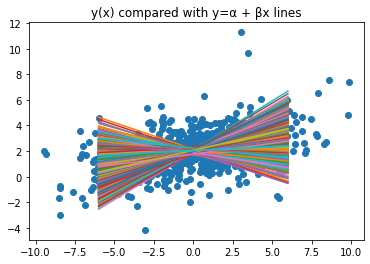

In [21]:
# 6
x_array = np.linspace(-6, 6, 1000)
plt.scatter(xses, y_points)

for i in range(1000):
    y_tmp = [betas[i] * x_array[j] + alphas[i] for j in range(1000)]
    plt.plot(x_array, y_tmp)
plt.title("y(x) compared with y=\u03B1 + \u03B2x lines")
plt.show()